In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-data/customer-transaction-dataset.xlsx


**Import the required Libraries**

In [3]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

# DATA COLLECTION

In [4]:
df = pd.read_excel('/kaggle/input/sample-data/customer-transaction-dataset.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**ANALYZE DATA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### Feature Information

From above information, we can tel that, the dataset contains 8 attributes:

* Invoice: Invoice number. *Nominal, a 6-digit integral number uniquely assigned to each transaction.   If this code starts with letter 'c', it indicates a cancellation.*
* StockCode: Product (item) code. *Nominal, a 5-digit integral number uniquely assigned to each distinct   product.*
* Description: *Product (item) name. Nominal.*
* Quantity: *The quantities of each product (item) per transaction. Numeric.*
* InvoiceDate: *Invoice Date and time. Numeric, the day and time when each transaction was generated.*
* UnitPrice: *Unit price. Numeric, Product price per unit in sterling.*
* CustomerID: *Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.*
* Country: *Country name. Nominal, the name of the country where each customer resides.*

Further, attributes Invoice, StockCode, Description and Country are non-numeric attributes, while the remaining 3 attributes are numerical

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [7]:
df.isnull().any()

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

From the above two cells, we can tell that Description contains **2928** missing entries and Customer ID contains **107927**.
As Customer ID is a critical attribute, hence we cannot perform any imputation to it.

In [9]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


# DATA PREPROCESSING

Number of Canceled Invoice

In [10]:
df['Invoice'] = df['Invoice'].astype('str')
df_invoiceCancel = df[df['Invoice'].str.contains('C')]
df_invoiceCancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [11]:
# Canceled Purchases
print("Number of columns with name 'Invoice' starting with 'C':", df_invoiceCancel.shape[0])

Number of columns with name 'Invoice' starting with 'C': 10206


In [12]:
count_negative_transac_no = sum(df['Quantity'] <= 0)

print("Number of transaction with negative quantity: ", count_negative_transac_no)

Number of transaction with negative quantity:  12326


In [13]:
result = df.loc[((df['Quantity'] <= 0) & (~df['Invoice'].str.contains('C', na=False)))]
print (result.shape)
result[result["Customer ID"].notna()]

(2121, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


There are 2121 invoices with negative quantities that are not marked as canceled. These entries are considered data errors and should be removed from the dataset. It has been observed that all of these entries have a null CustomerID.

#### Generate Report 

In [14]:
profile_data = ProfileReport(df, title='Online Retail Profiling Report', explorative=True) 
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Dealing with Null Values

In [15]:
def null_percentage(data):    
    # Assuming 'data' is your DataFrame
    missing_count = (data.isna().sum() )
    missing_percentages = (data.isna().sum() / data.shape[0]) * 100
    filtered_missing_count = missing_count[missing_count > 0]
    filtered_missing_percentages = missing_percentages[missing_percentages > 0]
    print("Missing Percentages: \n",filtered_missing_percentages)
    print("\nMissing Count :\n" ,filtered_missing_count)

In [16]:
null_percentage(df)

Missing Percentages: 
 Description     0.557225
Customer ID    20.539488
dtype: float64

Missing Count :
 Description      2928
Customer ID    107927
dtype: int64


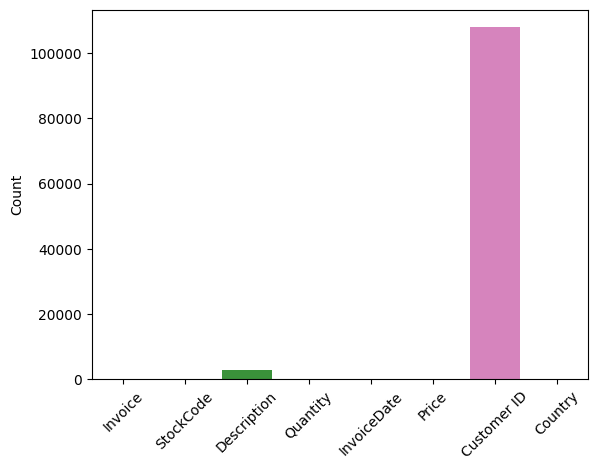

In [17]:
#checking null values in all columns in dataset
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(y=null_values.count_value,x=null_values.index)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [18]:
df.dropna(subset=['Customer ID'], how='all', inplace = True)

In [19]:
df.isnull().any()

Invoice        False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
Price          False
Customer ID    False
Country        False
dtype: bool

In [20]:
null_percentage(df)

Missing Percentages: 
 Series([], dtype: float64)

Missing Count :
 Series([], dtype: int64)


In [21]:
df.drop_duplicates(keep='first', inplace=True)

### Customer Churn Prediction

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Aggregate data at country x month level
monthly_data = df.groupby(['Country', 'Month']).agg(
    TotalCustomers=('Customer ID', 'nunique'),
    ChurnedCustomers=('Quantity', lambda x: (x < 0).sum())  # Counting canceled orders based on negative quantity
).reset_index()

In [27]:
# Calculate churn rate
monthly_data['ChurnRate'] = monthly_data['ChurnedCustomers'] / monthly_data['TotalCustomers']

In [28]:
# Select features and target variable
X = monthly_data[['TotalCustomers', 'ChurnedCustomers']]  # Features
y = monthly_data['ChurnRate']  # Target variable

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Use the trained model to predict churn for future months Based on predictions, take proactive actions to reduce churn

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.07196738420255452
Mean Squared Error: 0.03267357398290181
Root Mean Squared Error: 0.18075833032782143
R-squared: 0.9839976844556418


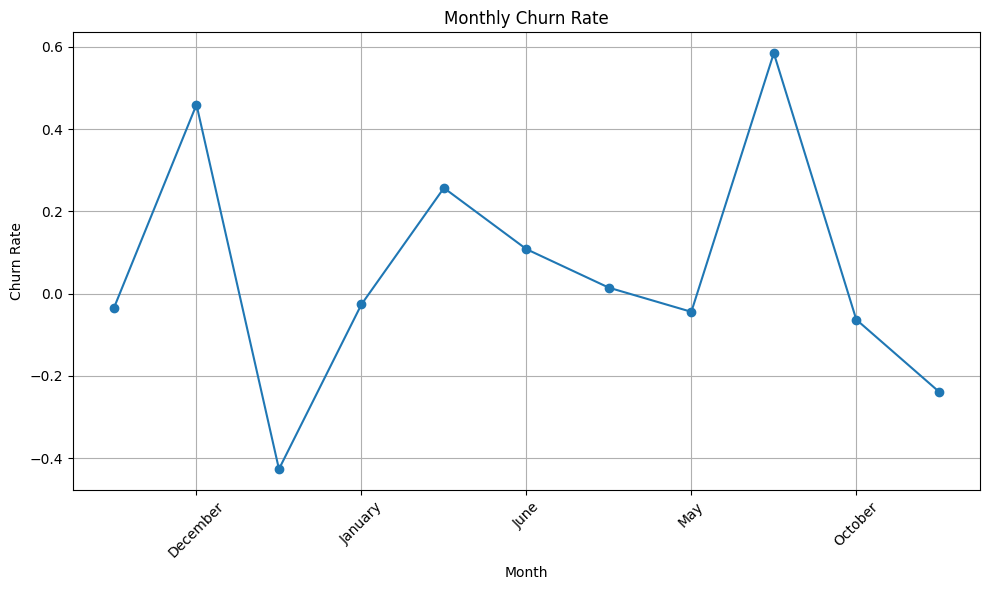

In [33]:
monthly_churn_rate = df.groupby('Month')['Customer ID'].nunique().diff() / df.groupby('Month')['Customer ID'].nunique().shift()

# Step 2: Plotting
plt.figure(figsize=(10, 6))
monthly_churn_rate.plot(marker='o', linestyle='-')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# FEATURE EXTRACTION

In [24]:
df['Total Cost'] = df['Quantity'] * df['Price']

In [25]:
df['Year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x : x.month_name())
df['Day'] = df['InvoiceDate'].apply(lambda x : x.day_name())
df['Date'] = df['InvoiceDate'].apply(lambda x : x.date())
df['Hour'] = df['InvoiceDate'].apply(lambda x : x.hour)
df["Quarter"] = df['InvoiceDate'].apply(lambda x : x.quarter)

In [34]:
grouped_features = ["Year", "Date", "Quarter","Month", "Day", "StockCode"]

In [35]:
df['TimeSegment'] = np.where((df["Hour"]>5)&(df["Hour"]<18), np.where(
                           df["Hour"]<12, 'Morning','Afternoon'),'Evening')
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year,Month,Day,Date,Hour,Quarter,TimeSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,December,Tuesday,2009-12-01,7,4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,December,Tuesday,2009-12-01,7,4,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,December,Tuesday,2009-12-01,7,4,Morning


In [36]:
# The number of cancellations by each customer. 
CancelbyCustomer = df_invoiceCancel.groupby('Customer ID').count()['Invoice'].reset_index().sort_values("Invoice",ascending=False)
CancelbyCustomer.rename(columns={'Invoice': 'Cancellations'}, inplace=True)
CancelbyCustomer.head(10) 

,Customer ID,Cancellations
963,15311.0,171
845,14911.0,140
1591,17511.0,110
765,14680.0,104
471,13798.0,102
720,14527.0,97
35,12471.0,89
36,12472.0,86
639,14277.0,83
231,13091.0,74


In [37]:
df_canceled_orders=df[df['Invoice'].str.contains('C')]
df_canceled_orders.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year,Month,Day,Date,Hour,Quarter,TimeSegment
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4,2009,December,Tuesday,2009-12-01,10,4,Morning
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9,2009,December,Tuesday,2009-12-01,10,4,Morning
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0,2009,December,Tuesday,2009-12-01,10,4,Morning
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6,2009,December,Tuesday,2009-12-01,10,4,Morning
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4,2009,December,Tuesday,2009-12-01,10,4,Morning


In [38]:
df_q = df.loc[((df['Quantity'] <= 0))]
print (df_q.shape[0])

9816


Canceled Orders needs to be removed

In [39]:
df=df[~df['Invoice'].str.contains('C')]
print(f'Dimensions of cleaned data to get results {df.shape}')

Dimensions of cleaned data to get results (400947, 16)


In [40]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year,Month,Day,Date,Hour,Quarter,TimeSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,December,Tuesday,2009-12-01,7,4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,December,Tuesday,2009-12-01,7,4,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,December,Tuesday,2009-12-01,7,4,Morning


# EXPLORATORY DATA ANALYSIS

In [41]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total Cost,Year,Hour,Quarter
count,400947.000000,400947,400947.000000,400947.000000,400947.000000,400947.000000,400947.000000,400947.000000
mean,13.768523,2010-07-01 04:56:11.466452992,3.305571,15361.454639,21.943633,2009.924481,12.865202,2.784929
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000,2009.000000,7.000000,1.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000,5.000000,2010.000000,11.000000,2.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000,2010.000000,13.000000,3.000000
75%,12.000000,2010-10-14 13:57:00,3.750000,16805.000000,19.500000,2010.000000,14.000000,4.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000,2010.000000,20.000000,4.000000
std,97.639816,NaN,35.046376,1680.669487,77.755308,0.264227,2.306908,1.143696


In [42]:
df.shape

(400947, 16)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400947 non-null  object        
 1   StockCode    400947 non-null  object        
 2   Description  400947 non-null  object        
 3   Quantity     400947 non-null  int64         
 4   InvoiceDate  400947 non-null  datetime64[ns]
 5   Price        400947 non-null  float64       
 6   Customer ID  400947 non-null  float64       
 7   Country      400947 non-null  object        
 8   Total Cost   400947 non-null  float64       
 9   Year         400947 non-null  int64         
 10  Month        400947 non-null  object        
 11  Day          400947 non-null  object        
 12  Date         400947 non-null  object        
 13  Hour         400947 non-null  int64         
 14  Quarter      400947 non-null  int64         
 15  TimeSegment  400947 non-null  object   

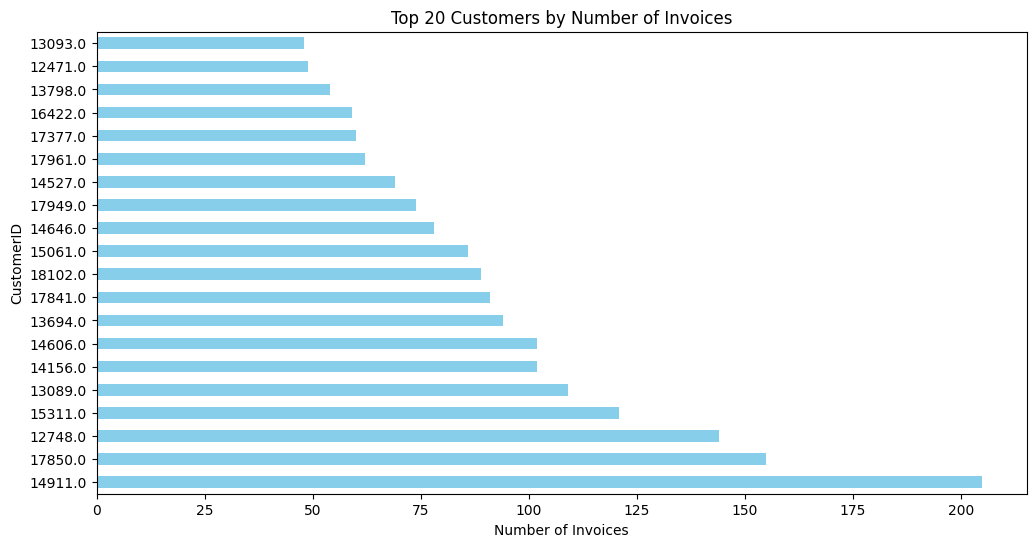

In [44]:
customer_invoice_counts = df.groupby('Customer ID')['Invoice'].nunique()

# Sort the customers by the number of invoices in descending order and take the top 20
top_20_customers = customer_invoice_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_20_customers.plot(kind='barh', color='skyblue')
plt.title('Top 20 Customers by Number of Invoices')
plt.ylabel('CustomerID')
plt.xlabel('Number of Invoices')
plt.show()

Top 3 Customers - Customer ID [14911] , [17850] , [12748]

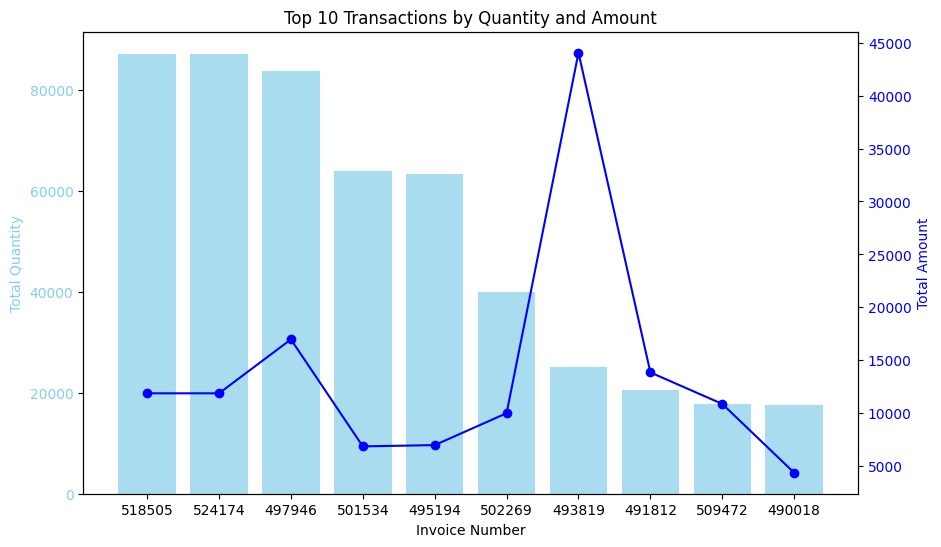

In [45]:
# Group the data by 'Invoice' and calculate the sum of quantities and amounts for each transaction
quantities_and_amounts_per_order = df.groupby('Invoice').agg(
    TotalQuantity=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    TotalAmount=pd.NamedAgg(column='Total Cost', aggfunc='sum')
).reset_index()

# Sort the transactions by total quantity in descending order and select the top 10
top_10_transactions = quantities_and_amounts_per_order.sort_values('TotalQuantity', ascending=False).head(10)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total quantity as a bar plot on the primary y-axis
ax1.bar(top_10_transactions['Invoice'], top_10_transactions['TotalQuantity'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Invoice Number')
ax1.set_ylabel('Total Quantity', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary y-axis for total amount as a line plot
ax2 = ax1.twinx()
ax2.plot(top_10_transactions['Invoice'], top_10_transactions['TotalAmount'], color='blue', marker='o')
ax2.set_ylabel('Total Amount', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set title and labels
plt.title('Top 10 Transactions by Quantity and Amount')

plt.show()

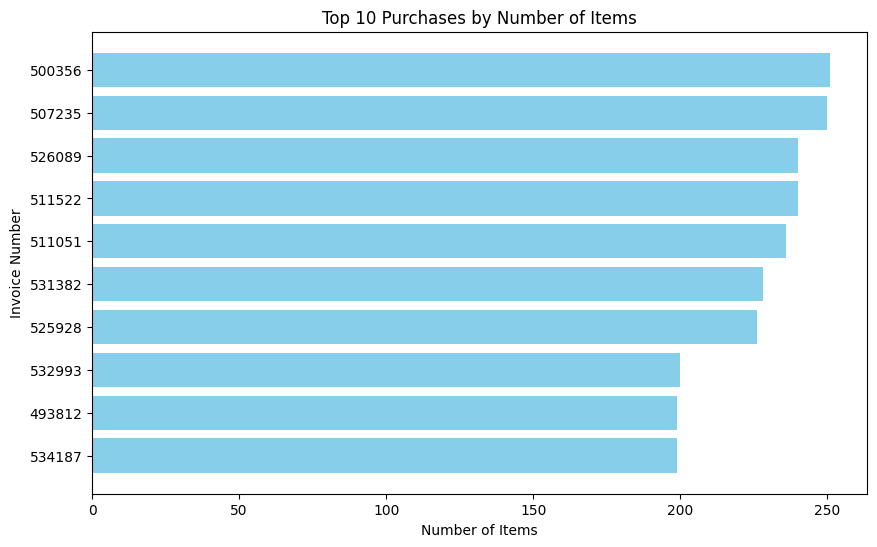

	Top 10 purchases:
       Invoice  StockCode
3973   500356        251
6716   507235        250
14246  526089        240
8271   511522        240
8054   511051        236
16347  531382        228
14204  525928        226
17026  532993        200
1597   493812        199
17545  534187        199


In [46]:
# Calculate the number of items per purchase (InvoiceNo)
items_per_purchase = df.groupby('Invoice')['StockCode'].count().reset_index()

# Sort the data to find the top 10 purchases with the most items
top_10_purchases = items_per_purchase.sort_values(by='StockCode', ascending=False).head(10)

# Create a bar plot to visualize the top 10 purchases
plt.figure(figsize=(10, 6))
plt.barh(top_10_purchases['Invoice'], top_10_purchases['StockCode'], color='skyblue')
plt.title('Top 10 Purchases by Number of Items')
plt.ylabel('Invoice Number')
plt.xlabel('Number of Items')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.show()

# Display the top 10 purchases
print("\tTop 10 purchases:\n",top_10_purchases)

Best Purchase : ~250 Items

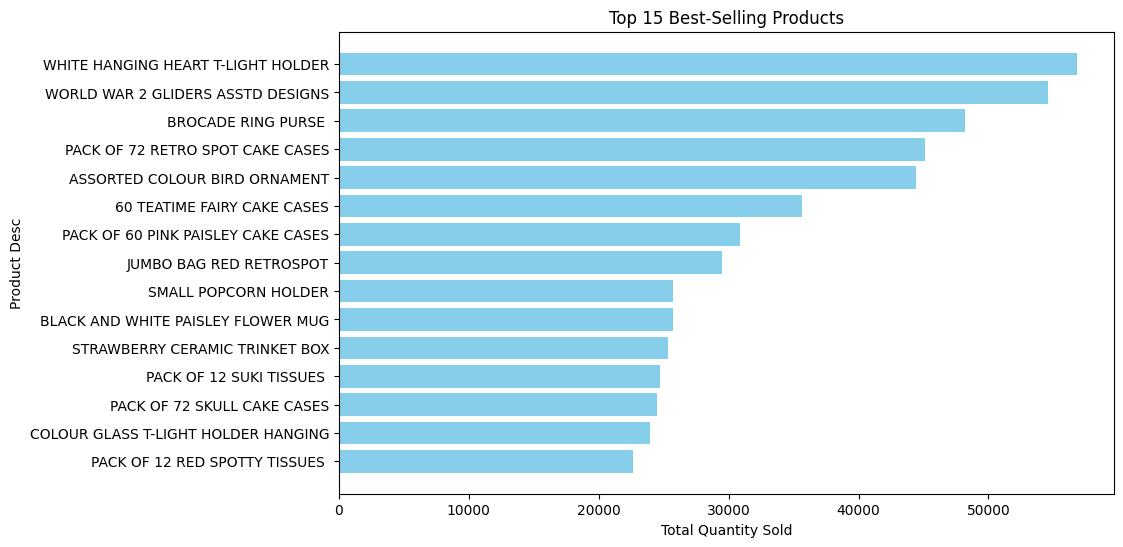

In [49]:
# Group the data by 'Description' and calculate the total quantity sold for each product
top_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order and select the top N products (e.g., top 10)
top_n = 15  
top_products = top_products.sort_values('Quantity', ascending=False).head(top_n)

# Create a horizontal bar plot to visualize the top-selling products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'], color='skyblue')
plt.title(f'Top {top_n} Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Desc')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest quantity at the top
plt.show()


Best Selling Products:
* White Hanging Heart T-Light Holder- 50000+ total quantity sold
* World War 2 Gliders ASSTD Design - 50000+ total quantity sold
* Brocade Ring Purse - ~50000 quantity sold overall

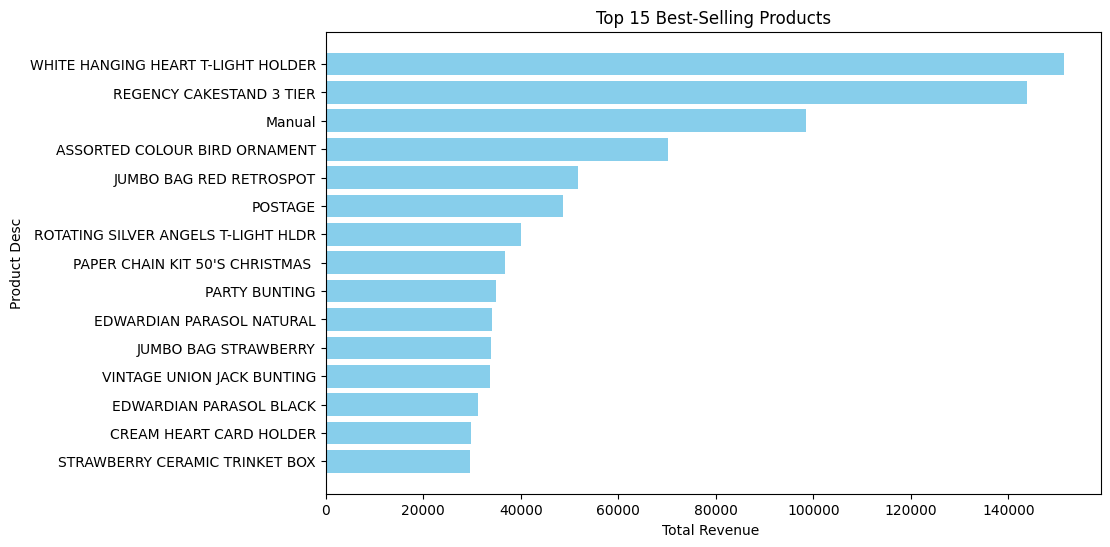

In [50]:
top_products = df.groupby('Description')['Total Cost'].sum().reset_index()

# Sort the products by total quantity sold in descending order and select the top N products (e.g., top 10)
top_n = 15  # Change this value to select a different number of top products
top_products = top_products.sort_values('Total Cost', ascending=False).head(top_n)

# Create a horizontal bar plot to visualize the top-selling products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Total Cost'], color='skyblue')
plt.title(f'Top {top_n} Best-Selling Products')
plt.xlabel('Total Revenue ')
plt.ylabel('Product Desc')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest quantity at the top
plt.show()

Most revenue generating product:
* White Hanging Heart T-Light Holder
* Regency Cakestand 3 tier
* Manual

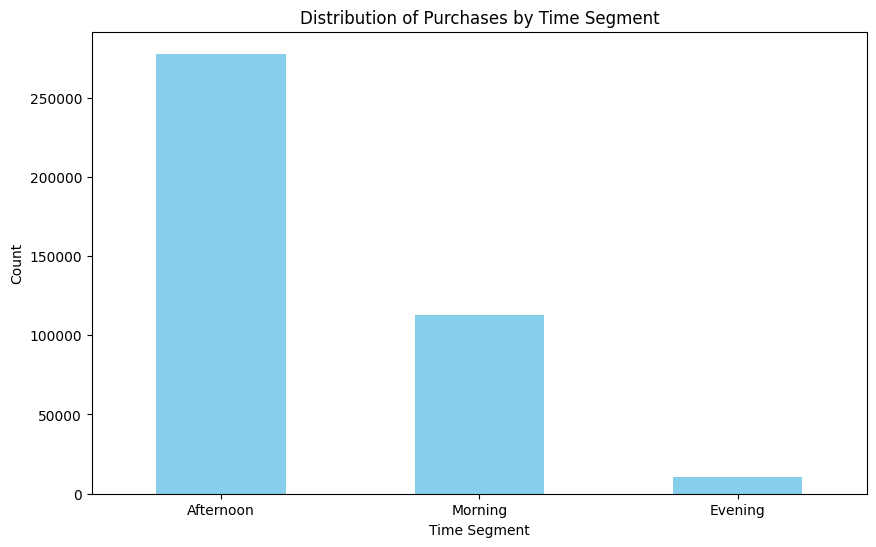

In [51]:
time_segment_counts = df['TimeSegment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
time_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Purchases by Time Segment')
plt.xlabel('Time Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

As observed, Afternoon is the best time to sell products, followed by Morning and lastly Evening

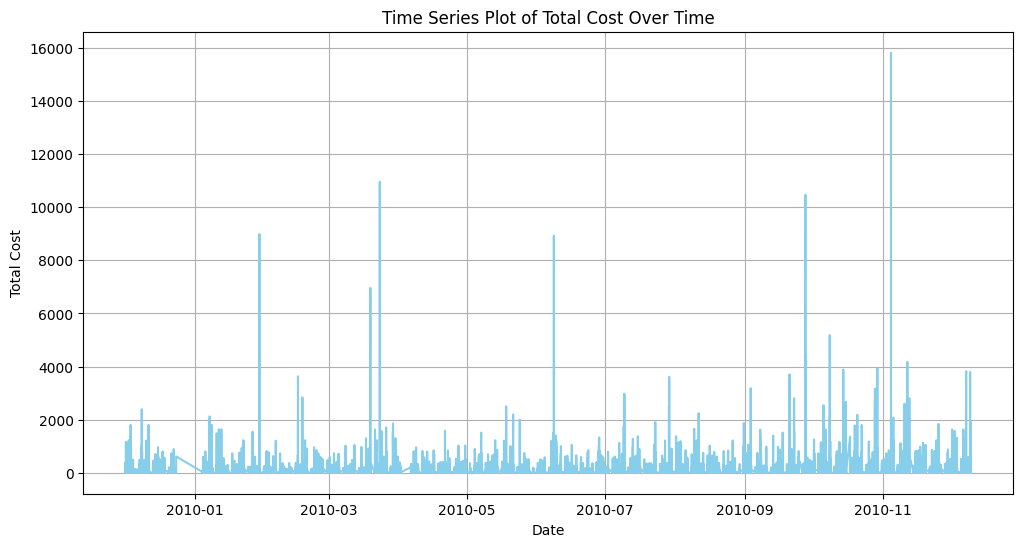

In [52]:
# Temporal Trends - Time Series Plot of Total Cost
plt.figure(figsize=(12, 6))
plt.plot(df['InvoiceDate'], df['Total Cost'], color='skyblue')
plt.title('Time Series Plot of Total Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

November 2010 can be said to be the best selling month 

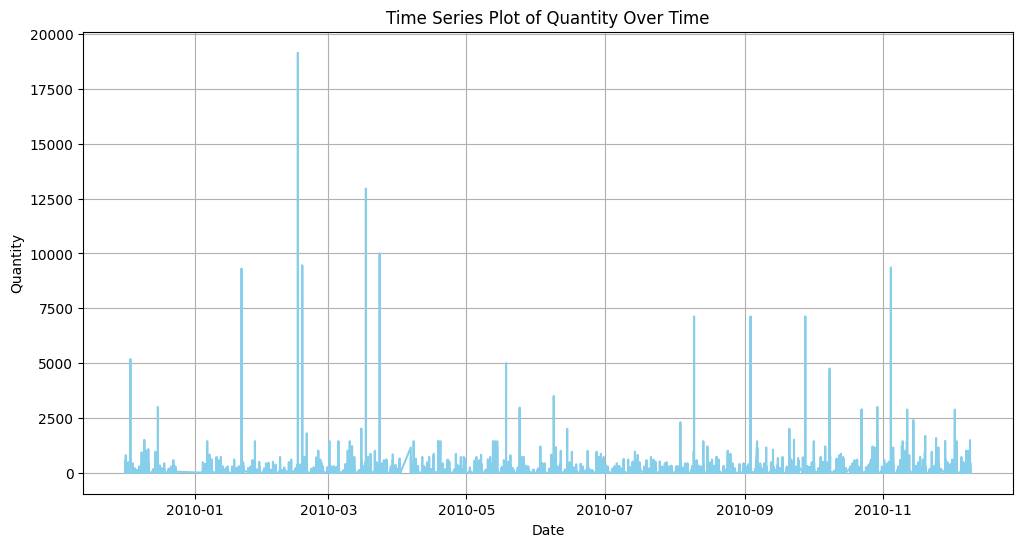

In [53]:
# Temporal Trends - Time Series Plot of Quantity
plt.figure(figsize=(12, 6))
plt.plot(df['InvoiceDate'], df['Quantity'], color='skyblue')
plt.title('Time Series Plot of Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

Feb-2010 is the highest selling month 

In [54]:
df['Year'].unique()

array([2009, 2010])

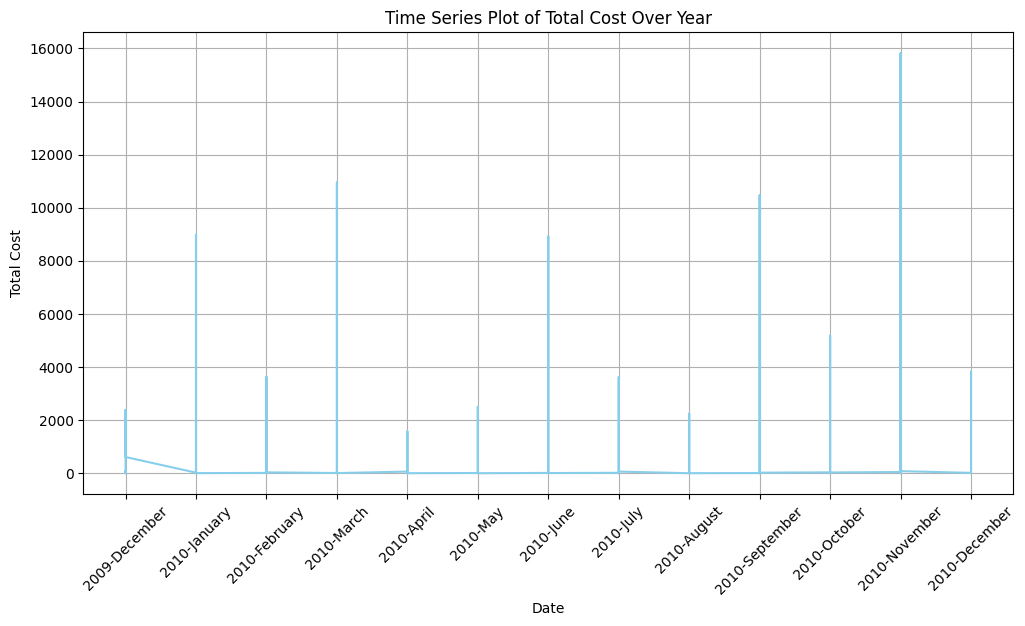

In [55]:
# Temporal Trends - Time Series Plot of Year 
plt.figure(figsize=(12, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['Total Cost'], color='skyblue')
plt.title('Time Series Plot of Total Cost Over Year')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

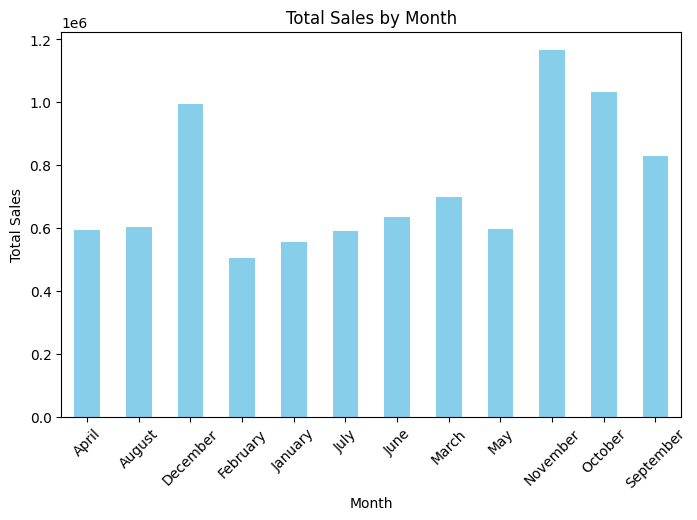

In [56]:
# Sales by Month
monthly_sales = df.groupby('Month')['Total Cost'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

September, October, November and December are the best selling months

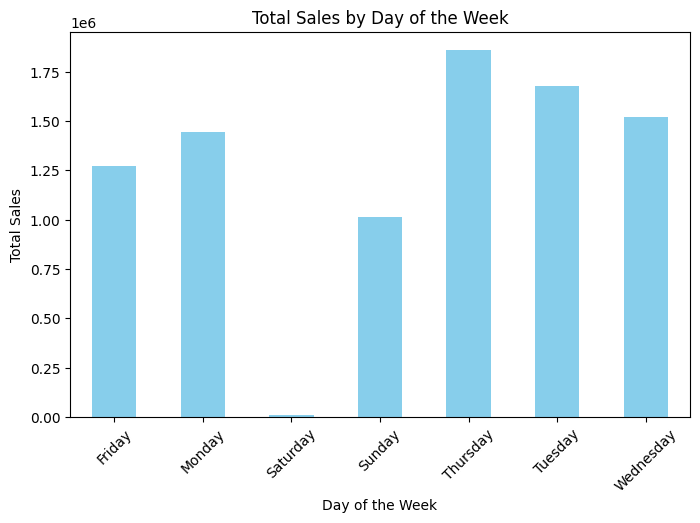

In [57]:
# Sales by Day of the Week
day_of_week_sales = df.groupby('Day')['Total Cost'].sum()
plt.figure(figsize=(8, 5))
day_of_week_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Saturday and Thursday are the least selling days of the week

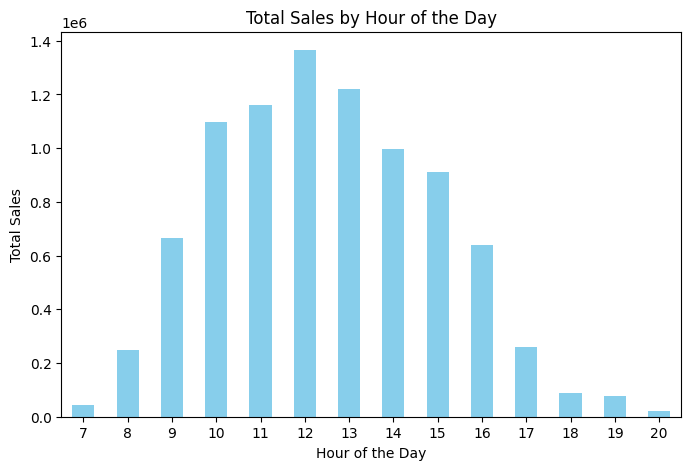

In [58]:
# Peak Sales Hours
hourly_sales = df.groupby('Hour')['Total Cost'].sum()
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

We can tell from above that 10:00 a.m. to 3:00 p.m are the peak hours

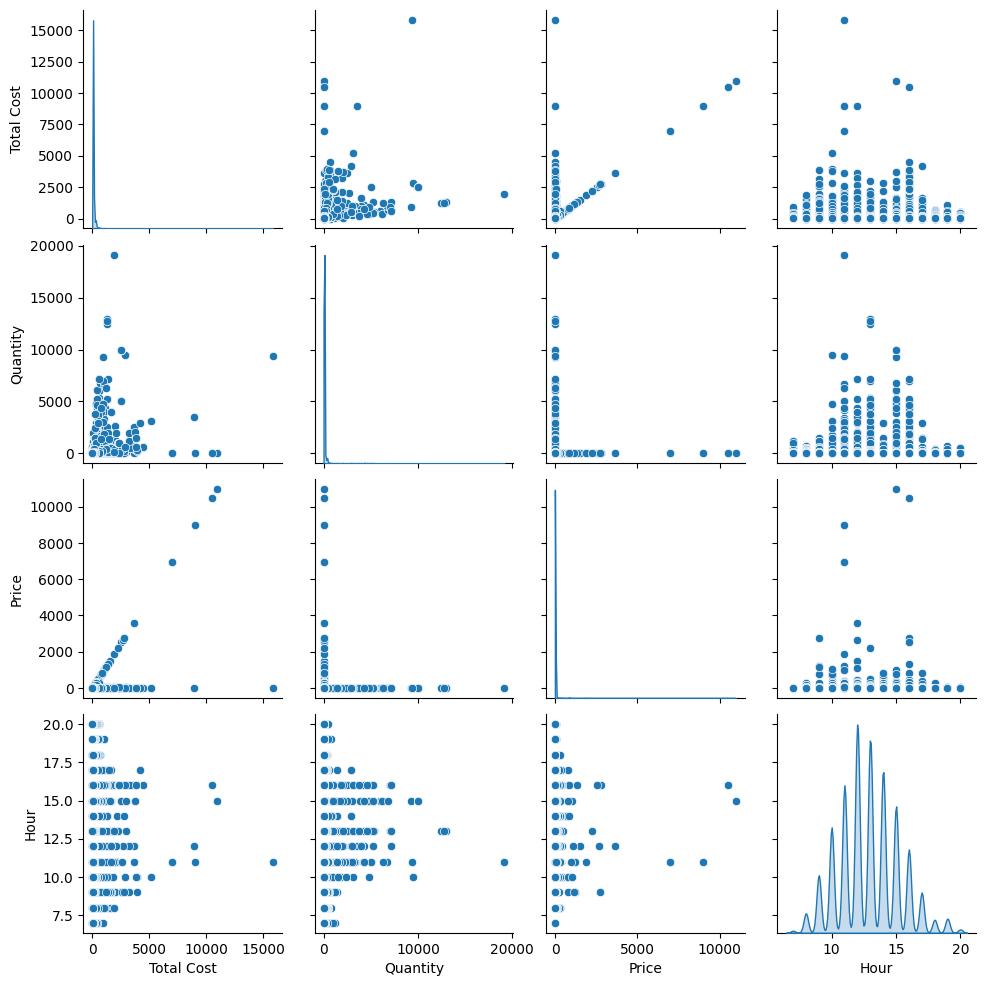

In [60]:
selected_columns = ['Total Cost', 'Quantity', 'Price', 'Hour', 'Day', 'Month']

# Create a pair plot
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()

In [61]:
df.Country.value_counts().head(10)

Country
United Kingdom    364255
EIRE                8503
Germany             7652
France              5452
Netherlands         2729
Spain               1228
Switzerland         1170
Belgium             1037
Portugal             983
Sweden               867
Name: count, dtype: int64

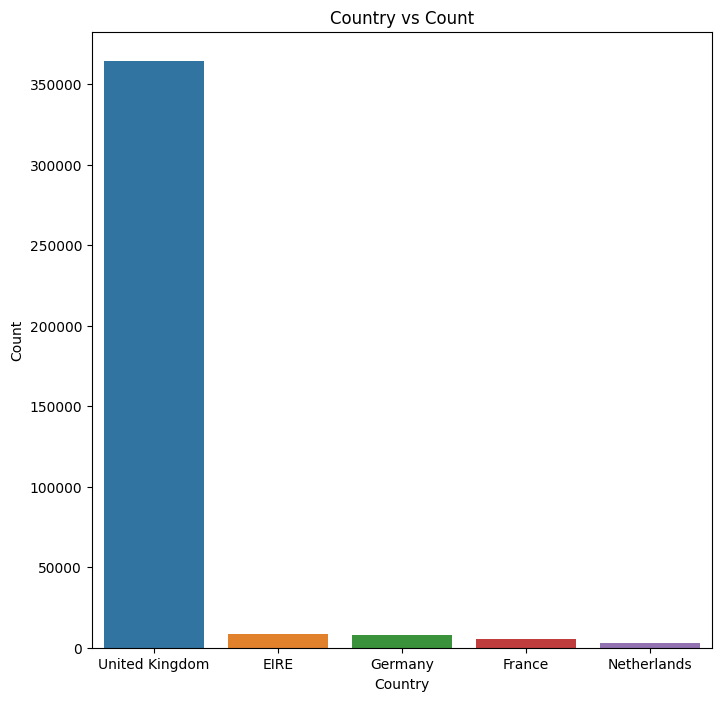

In [62]:
country_counts = df['Country'].value_counts().head()
plt.figure(figsize=(8,8))
sns.barplot(x = country_counts.index, y = country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country vs Count')
plt.show()

United Kingdom is the Country having largest customers. 

In [63]:
quantity = df.Quantity.value_counts().head(10)
quantity

Quantity
1     75598
12    59532
2     59172
6     42234
4     29866
3     28531
24    22687
10    17911
8     11791
5      9278
Name: count, dtype: int64

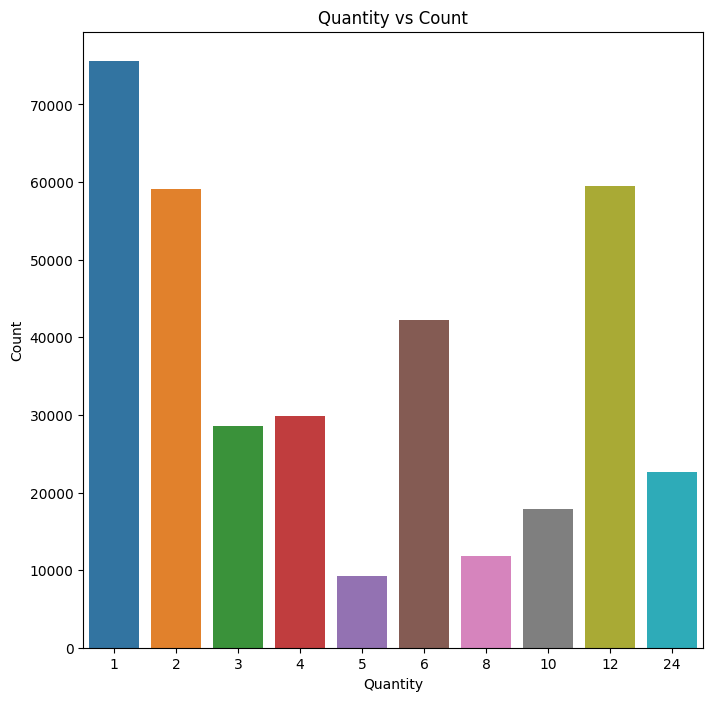

In [64]:
plt.figure(figsize=(8,8))
sns.barplot(x = quantity.index, y = quantity.values)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Quantity vs Count')
plt.show()

Now, let's remove negative entries

In [65]:
df['Quantity'].describe()

count    400947.000000
mean         13.768523
std          97.639816
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [66]:
df = df[df['Quantity']>0]
df.Quantity.describe()

count    400947.000000
mean         13.768523
std          97.639816
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [67]:
df.Price.describe()

count    400947.000000
mean          3.305571
std          35.046376
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

In [68]:
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year,Month,Day,Date,Hour,Quarter,TimeSegment


In [69]:
df = df[df['Price']>0]
df.Price.describe()

count    400916.000000
mean          3.305826
std          35.047719
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

# Time-Series Analysis

In [70]:
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [71]:
now = dt.date(2024,5,14)

In [72]:
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [73]:
df.InvoiceDate.max() - df.InvoiceDate.min()

Timedelta('373 days 12:16:00')

In [74]:
print(f"Datafile starts with timepoint {df.InvoiceDate.min()}")
print(f"Datafile ends with timepoint {df.InvoiceDate.max()}")

Datafile starts with timepoint 2009-12-01 07:45:00
Datafile ends with timepoint 2010-12-09 20:01:00


### Forecast of Sales using ARIMA

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
# Prepare Time Series Data
ts_data = df.set_index('InvoiceDate')['Total Cost']

In [77]:
ts_data_resampled = ts_data.resample('D').sum().fillna(0)

In [78]:
# Train-Test Split
train_size = int(len(ts_data_resampled) * 0.8)

train_data, test_data = ts_data_resampled[:train_size], ts_data_resampled[train_size:]

In [79]:
import itertools

# Define parameter ranges
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Generate all possible combinations of parameters
parameter_combinations = list(itertools.product(p_range, d_range, q_range))

best_aic = float("inf")
best_params = None

# Grid search
for params in parameter_combinations:
    try:
        model = ARIMA(train_data, order=params)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

Best AIC: 6402.735295818095
Best Parameters: (5, 0, 4)


In [80]:
best_params = (5,0,4) 

In [81]:
# Fit the ARIMA model with the best parameters
model = ARIMA(train_data, order=best_params)
model_fit = model.fit()

In [82]:
# Forecast for the next two months
preds = model_fit.forecast(steps=len(test_data))

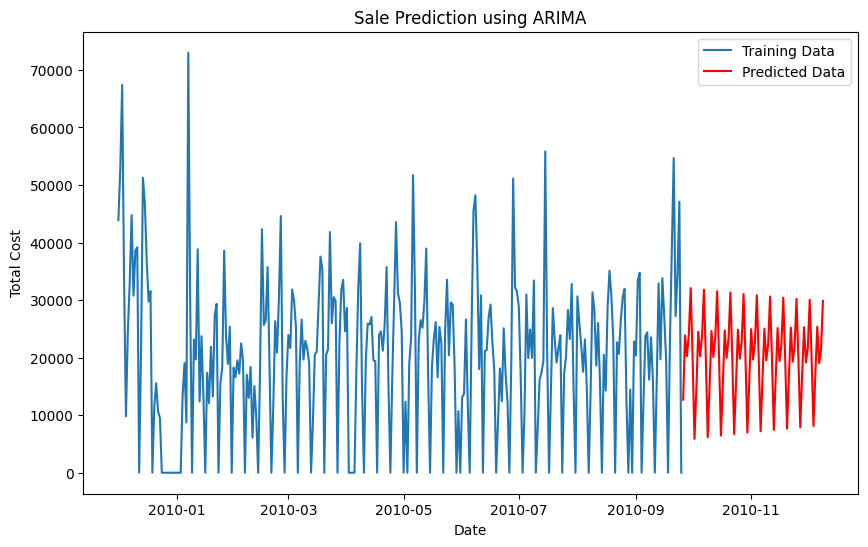

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, preds, color='red', label='Predicted Data')
plt.title('Sale Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.legend()
plt.show()

# RFM Analysis

The RFM model serves as a marketing analysis framework employed to categorize and gain insights into customer behavior using three primary dimensions: Recency, Frequency, and Monetary Value. It is a widely utilized tool in the business world for dividing their customer base into separate segments, enabling them to implement tailored marketing tactics and individualized communication.

Recency assesses the timeliness of the customer's last purchase. Frequency examines how frequently the customer makes purchases. Monetary Value evaluates the amount the customer spends. </br> </br> Recency - assesses the timeliness of the customer's last purchase. </br> Frequency - examines how frequently the customer makes purchases. </br> Monetary - Value evaluates the amount the customer spends. </br></br>

Recency - To calculate recency for each customer, we start by taking the current date and subtracting the date of their last purchase.

Frequency - To measure frequency, we count how often customers make purchases.

Monetary - To determine monetary value, we calculate the total amount customers spend on their purchases.

In [84]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year,Month,Day,Date,Hour,Quarter,TimeSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,December,Tuesday,2009-12-01,7,4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday,2009-12-01,7,4,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,December,Tuesday,2009-12-01,7,4,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,December,Tuesday,2009-12-01,7,4,Morning


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  float64       
 7   Country      400916 non-null  object        
 8   Total Cost   400916 non-null  float64       
 9   Year         400916 non-null  int64         
 10  Month        400916 non-null  object        
 11  Day          400916 non-null  object        
 12  Date         400916 non-null  object        
 13  Hour         400916 non-null  int64         
 14  Quarter      400916 non-null  int64         
 15  TimeSegment  400916 non-null  object   

In [86]:
rec_df = df.groupby(['Customer ID'], as_index = False)['Date'].max()
rec_df.columns = ['Customer ID', 'LastPurchasedDate']
rec_df.head()

,Customer ID,LastPurchasedDate
0,12346.0,2010-06-28
1,12347.0,2010-12-07
2,12348.0,2010-09-27
3,12349.0,2010-10-28
4,12351.0,2010-11-29


In [87]:
len(rec_df['Customer ID'].unique())

4312

In [88]:
rec_df['Recent'] = rec_df['LastPurchasedDate'].apply(lambda x: (now - x).days)
rec_df.head()

,Customer ID,LastPurchasedDate,Recent
0,12346.0,2010-06-28,5069
1,12347.0,2010-12-07,4907
2,12348.0,2010-09-27,4978
3,12349.0,2010-10-28,4947
4,12351.0,2010-11-29,4915


In [89]:
rec_df.drop(columns=['LastPurchasedDate'], inplace=True)
rec_df.head()

,Customer ID,Recent
0,12346.0,5069
1,12347.0,4907
2,12348.0,4978
3,12349.0,4947
4,12351.0,4915


In [90]:
freq_df = df.copy()
freq_df.drop_duplicates(subset=['Customer ID', 'Invoice'], keep = 'first', inplace = True)
freq_df = freq_df.groupby(['Customer ID'], as_index = False)['Invoice'].count()
freq_df.columns = ['Customer ID', 'Frequency']
freq_df.head()

,Customer ID,Frequency
0,12346.0,11
1,12347.0,2
2,12348.0,1
3,12349.0,3
4,12351.0,1


In [91]:
mon_df = df.groupby('Customer ID', as_index = False)['Total Cost'].sum()
mon_df.columns = ['Customer ID', 'Monetary']
mon_df.head()

,Customer ID,Monetary
0,12346.0,372.86
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2671.14
4,12351.0,300.93


In [92]:
# rf = rec_df.merge(freq_df, left_on='Customer ID', right_on = 'Customer ID')
# rfm = rf.merge(mon_df, left_on='Customer ID', right_on = 'Customer ID')
rf = rec_df.merge(freq_df, on='Customer ID')
rfm = rf.merge(mon_df, on='Customer ID')
rfm.set_index('Customer ID', inplace = True)
rfm.head()

,Recent,Frequency,Monetary
Customer ID,,,
12346.0,5069,11,372.86
12347.0,4907,2,1323.32
12348.0,4978,1,222.16
12349.0,4947,3,2671.14
12351.0,4915,1,300.93


In [93]:
#bring all the quartile value in a single dataframe
rfm_segmentation = rfm.copy()

In [94]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recent     4312 non-null   int64  
 1   Frequency  4312 non-null   int64  
 2   Monetary   4312 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 134.8 KB


In [95]:
rfm_segmentation.isnull().any()

Recent       False
Frequency    False
Monetary     False
dtype: bool

#### Clustering using K-Means 

In [96]:
from sklearn.cluster import KMeans

To find the optimum number of clusters, we are using Elbow method.
The Elbow Method helps to identify the point where the inertia starts to decrease at a slower rate, indicating that adding more clusters does not significantly improve the model's performance.

In [97]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).inertia_ for i in range(len(kmeans))]

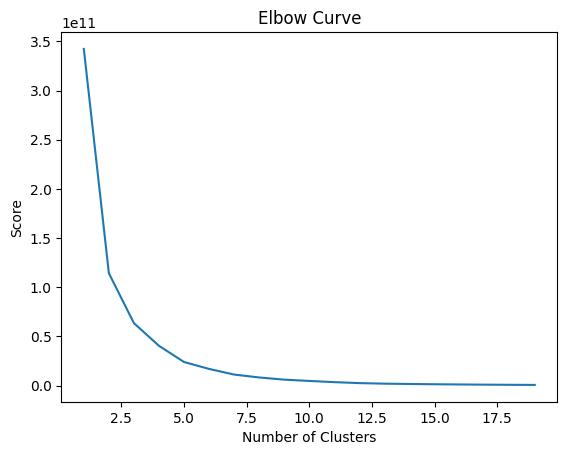

In [98]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


From above graph, we can see that the graph descends slowly after 3. That's why, we should take 3 as the optimal number of clusters

In [99]:
kmeans = KMeans(n_clusters=3, random_state = 0).fit(rfm_segmentation) #fitting data in Kmeans theorem.

rfm_segmentation['Cluster'] = kmeans.labels_   #create a new column called cluster which has cluster number for each row respectively          

In [100]:
rfm_segmentation[rfm_segmentation.Cluster == 0].sort_values(by='Recent', ascending=False).head(10)


,Recent,Frequency,Monetary,Cluster
Customer ID,,,,
12636.0,5278,1,141.00,0
14654.0,5278,1,246.86,0
17056.0,5278,1,128.60,0
16763.0,5278,1,352.85,0
17592.0,5278,1,148.30,0
13526.0,5278,2,1182.00,0
12362.0,5278,1,130.00,0
17909.0,5277,1,110.05,0
14980.0,5277,1,150.68,0


In [101]:
rfm_segmentation[rfm_segmentation.Cluster == 1].sort_values(by='Recent', ascending=False)


,Recent,Frequency,Monetary,Cluster
Customer ID,,,,
14646.0,4914,78,248396.50,1
14156.0,4911,102,196549.74,1
14911.0,4905,205,152121.22,1
18102.0,4905,89,349164.35,1


In [102]:
rfm_segmentation[rfm_segmentation.Cluster == 2].sort_values(by='Recent', ascending=False).head(10)


,Recent,Frequency,Monetary,Cluster
Customer ID,,,,
13902.0,5172,5,34095.260,2
17940.0,4985,6,26286.750,2
16705.0,4940,22,29480.061,2
12931.0,4920,42,50291.380,2
16684.0,4919,27,80489.210,2
13881.0,4915,23,28019.580,2
14298.0,4915,38,39667.190,2
17389.0,4914,27,25381.650,2
13093.0,4913,48,47111.180,2


From the above three dataframes, we get observe that cluster 0 have high recency rate, which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.

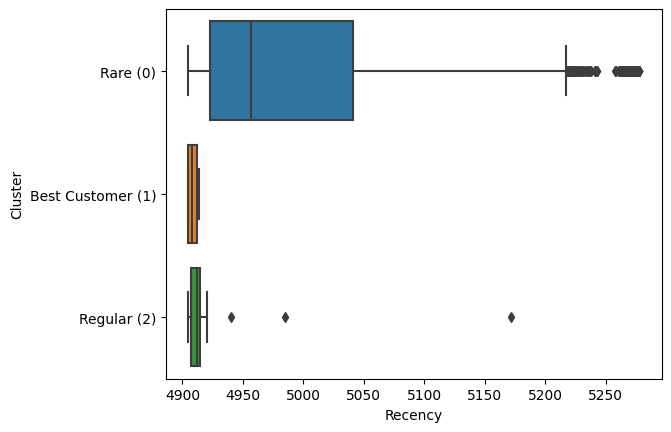

In [103]:
sns.boxplot(y='Cluster', x='Recent', data=rfm_segmentation, orient='h')
plt.yticks(ticks = [0,1,2], labels=['Rare (0)', 'Best Customer (1)', 'Regular (2)'])
plt.xlabel('Recency')
plt.ylabel('Cluster')
plt.show()

Cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.

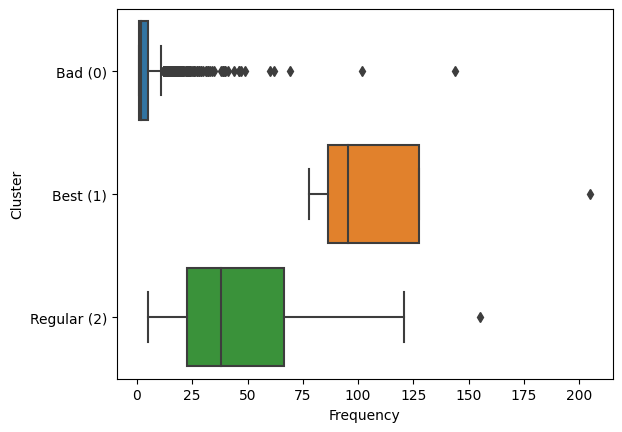

In [104]:
sns.boxplot(y='Cluster', x='Frequency', data=rfm_segmentation, orient='h')
plt.xlabel('Frequency')
plt.yticks(ticks = [0,1,2], labels=['Bad (0)', 'Best (1)', 'Regular (2)'])
plt.ylabel('Cluster')
plt.show()

Cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.

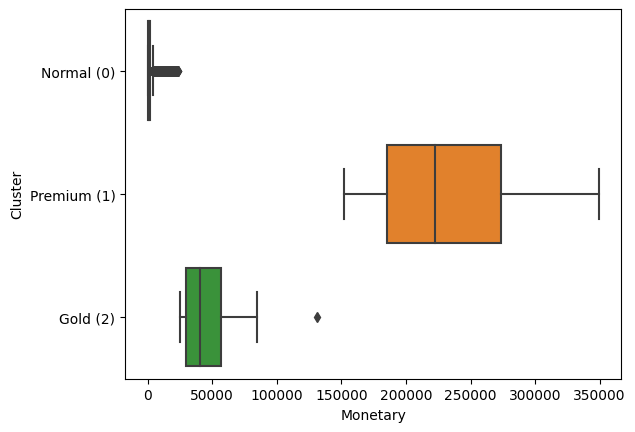

In [105]:
sns.boxplot(y='Cluster', x='Monetary', data=rfm_segmentation, orient='h')
plt.xlabel('Monetary')
plt.yticks(ticks = [0,1,2], labels=['Normal (0)', 'Premium (1)', 'Gold (2)'])
plt.ylabel('Cluster')
plt.show()

Overall, based on the customer Segmentation, the following observation can be made:<br>
**Cluster 1 - Platinum customers**<br> **Cluster 2 - Gold Customers**<br> **Cluster 3 - Silver Customers**

Calculate RFM Score

In [106]:
#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [107]:
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recent,Frequency,Monetary
0.25,4922.0,1.0,307.1875
0.50,4957.0,2.0,701.6150
0.75,5040.0,5.0,1714.9325


In [108]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recent'].apply(RScore,args=('Recent',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [109]:
quantile.to_dict()

{'Recent': {0.25: 4922.0, 0.5: 4957.0, 0.75: 5040.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.1875, 0.5: 701.615, 0.75: 1714.9325000000001}}

In [110]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile + rfm_segmentation.F_Quartile + rfm_segmentation.M_Quartile
                            
rfm_segmentation.head()

,Recent,Frequency,Monetary,Cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer ID,,,,,,,,
12346.0,5069,11,372.86,0,4,1,3,8
12347.0,4907,2,1323.32,0,1,3,2,6
12348.0,4978,1,222.16,0,3,4,4,11
12349.0,4947,3,2671.14,0,2,2,1,5
12351.0,4915,1,300.93,0,1,4,4,9


In [111]:
rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + rfm_segmentation['M_Quartile']
rfm_segmentation.head()

,Recent,Frequency,Monetary,Cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
Customer ID,,,,,,,,,
12346.0,5069,11,372.86,0,4,1,3,8,8
12347.0,4907,2,1323.32,0,1,3,2,6,6
12348.0,4978,1,222.16,0,3,4,4,11,11
12349.0,4947,3,2671.14,0,2,2,1,5,5
12351.0,4915,1,300.93,0,1,4,4,9,9


In [112]:
# Dictionary representing RFM segmentation by recency
rfm_recency_dict = {
    'Best Customers': len(rfm_segmentation[rfm_segmentation['R_Quartile'] == 1]),
    'Loyal Customers': len(rfm_segmentation[rfm_segmentation['R_Quartile'] == 2]),
    'Occasional Buyers': len(rfm_segmentation[rfm_segmentation['R_Quartile'] == 3]), 
    'Lost Customers': len(rfm_segmentation[rfm_segmentation['R_Quartile'] == 4])
}

In [113]:
rfm_dict = {
    'Best': len(rfm_segmentation[rfm_segmentation['RFMScore']==3]),
    'Loyal Customers': len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]),
    'Big Spenders': len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]),
    'Occasional Buyers': len(rfm_segmentation[rfm_segmentation['RFMScore']==7]),
    'Lost Customers': len(rfm_segmentation[rfm_segmentation['RFMScore']==11]),
    'Lost Cheap Customers': len(rfm_segmentation[rfm_segmentation['RFMScore']==12])
}

In [114]:
rfm_segmentation['Label'] = 'Bronze' 
rfm_segmentation.loc[rfm_segmentation['RFMScore'] > 4, 'label'] = 'Silver' 
rfm_segmentation.loc[rfm_segmentation['RFMScore'] > 6, 'label'] = 'Gold'
rfm_segmentation.loc[rfm_segmentation['RFMScore'] > 8, 'label'] = 'Platinum'
rfm_segmentation.loc[rfm_segmentation['RFMScore'] > 10, 'label'] = 'Diamond'

In [115]:
rfm_segmentation.head()

,Recent,Frequency,Monetary,Cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score,Label,label
Customer ID,,,,,,,,,,,
12346.0,5069,11,372.86,0,4,1,3,8,8,Bronze,Gold
12347.0,4907,2,1323.32,0,1,3,2,6,6,Bronze,Silver
12348.0,4978,1,222.16,0,3,4,4,11,11,Bronze,Diamond
12349.0,4947,3,2671.14,0,2,2,1,5,5,Bronze,Silver
12351.0,4915,1,300.93,0,1,4,4,9,9,Bronze,Platinum


In [116]:
# Extracting keys and values
keys_r = list(rfm_recency_dict.keys())
values_r = list(rfm_recency_dict.values())

In [117]:
keys = list(rfm_dict.keys())
values = list(rfm_dict.values())

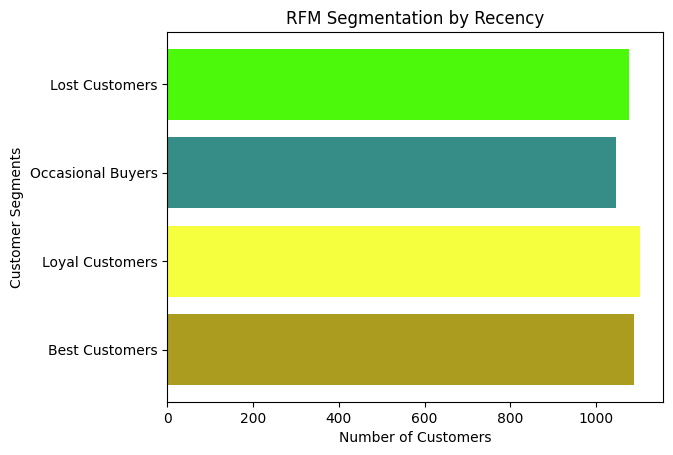

In [118]:
colors = np.random.rand(len(keys_r), 3)
plt.barh(keys_r, values_r, color=colors)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segments')
plt.title('RFM Segmentation by Recency')
plt.show()

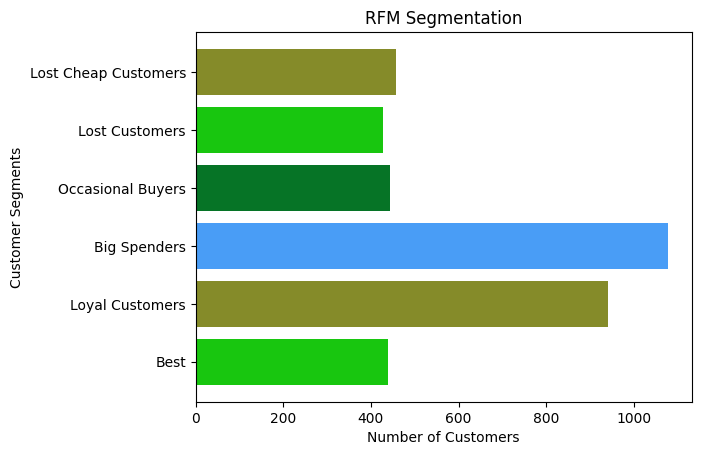

In [119]:
colors = np.random.rand(len(keys_r), 3)
plt.barh(keys, values, color=colors)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segments')
plt.title('RFM Segmentation')
plt.show()

In [120]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean().head()

RFMScore
3    10036.341802
4     3487.042486
5     2343.019561
6     1626.008110
7     1138.918358
Name: Monetary, dtype: float64

In [121]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean().head()

Total_score
3    10036.341802
4     3487.042486
5     2343.019561
6     1626.008110
7     1138.918358
Name: Monetary, dtype: float64

<Axes: ylabel='Total_score'>

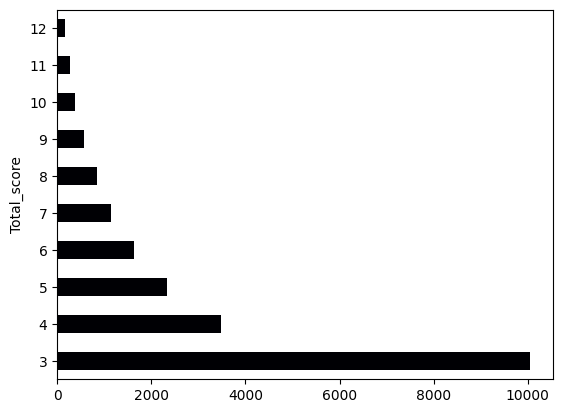

In [122]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='barh', colormap='inferno')

Based on Monetary we see Total Score 3,4,5 have highest value which is good for model

<Axes: ylabel='Total_score'>

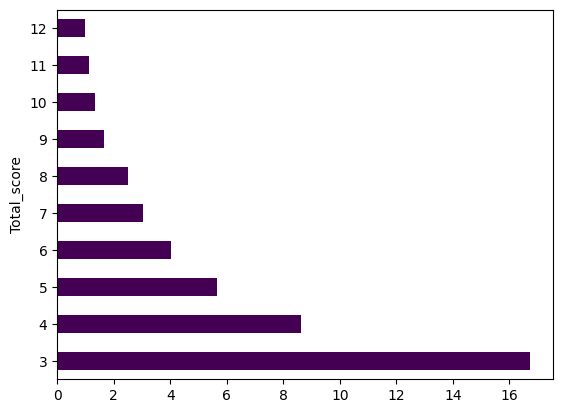

In [123]:
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='barh', colormap='viridis')

Based on Frequncy we see Total Score 3,4,5 have highest value which is good for model

<Axes: ylabel='Total_score'>

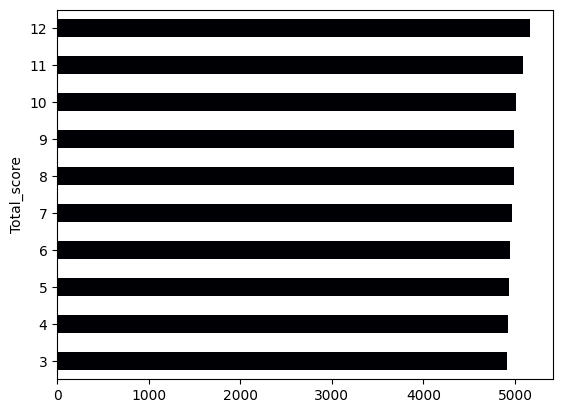

In [124]:
rfm_segmentation.groupby('Total_score')['Recent'].mean().plot(kind='barh', colormap='magma')

Based on Recency we see Total Score 10,11,12 have highest value which is good for model.

### Recommending Stocks/Products to Customers

In [125]:
cluster_numbers = [0, 1, 2]

# Create an empty dictionary to store the top products for each cluster
top_products_by_cluster = {}

# Iterate over each cluster number
for cluster in cluster_numbers:
    customers_in_cluster = list(rfm_segmentation[rfm_segmentation['Cluster'] == cluster].index)
    
    # Filter and calculate top products as in your previous code
    top_products = df[df['Customer ID'].isin(customers_in_cluster)].groupby(['StockCode'])['Invoice'].count().sort_values(ascending=False).head(10)
    
    # Store the top products in the dictionary with the cluster number as the key
    top_products_by_cluster[cluster] = top_products
# You can now access the top products for each cluster using the dictionary
# For example, top products for cluster 0 would be top_products_by_cluster[0]

In [126]:
stocks_not_bought_by_customer_in_cluster = {}

# Iterate over each cluster
for cluster, top_products in top_products_by_cluster.items():
    # Get the customers in the current cluster
    customers_in_cluster = list(rfm_segmentation[rfm_segmentation['Cluster'] == cluster].index)
    
    # Initialize a dictionary for the current cluster
    stocks_not_bought_by_customer_in_cluster[cluster] = {}
    
    # Iterate over each customer in the cluster
    for customer in customers_in_cluster:
        # Get the list of products the customer bought
        products_bought_by_customer = set(df[(df['Customer ID'] == customer) & (df['StockCode'].isin(top_products.index))]['StockCode'])
        
        # Find the products the customer didn't buy from the top products list
        products_not_bought = list(set(top_products.index) - products_bought_by_customer)
        
        # Store the result in the dictionary
        stocks_not_bought_by_customer_in_cluster[cluster][customer] = products_not_bought

In [127]:
def get_stocks_not_bought_by_customer_in_cluster(customer_id, rfm):
    
    cluster =  rfm["Cluster"][rfm.index == customer_id].values[0]
    if cluster not in stocks_not_bought_by_customer_in_cluster:
        return []
    
    return  customer_id ,stocks_not_bought_by_customer_in_cluster[cluster][customer_id]

In [128]:
# let's take a random cutomer for example
get_stocks_not_bought_by_customer_in_cluster(12351.0 ,rfm_segmentation)

(12351.0,
 [84991, 21034, 84879, 21232, 20725, 22423, 21754, '85123A', 21212, '85099B'])

The Stocks / Items that the Customer 12351 is recommended to buy are 
* '85123A'
* 21754
* 21034
* 84879
* 21232
* 20725
* 22423
* '85099B'
* 21212
* 84991